Zadanie 1.

In [307]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as plt

def lagrange(X, Y):
    
    def P(x):
        result = 0
        for k in range(len(X)):
            element = 1
            for j in range(len(X)):
                if j != k:
                    element *= (x - X[j])/(X[k] - X[j])
            result += element * Y[k]
        return result
    
    return P


Zadanie 2.
Przy interpolacji za pomocą węzłów równoodległych dochodzi do zjawiska Rungego
Wiem, że miały być tylko 2 wykresy, ale wtedy jest to mniej przejrzyste 

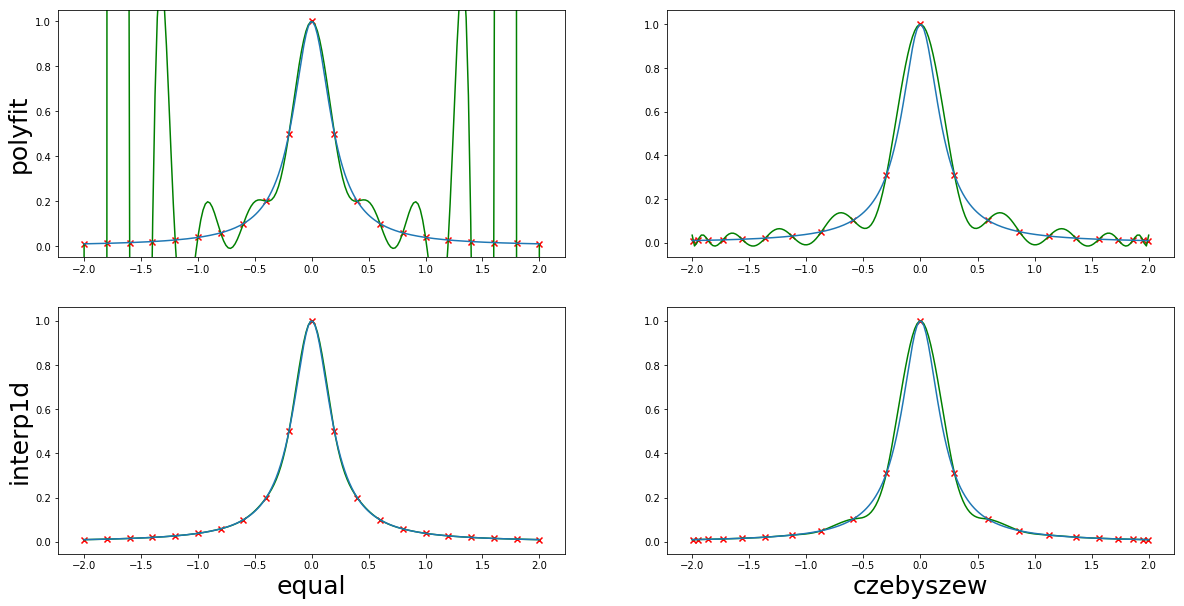

In [241]:
f = lambda x: 1/(25*x**2+1)
D = np.linspace(-2, 2, 200)

def czebyszew_nodes(a, b, n):
    nodes = np.cos(np.pi*(2*np.arange(1,n+1)-1)/(2*n))
    return nodes*(b-a)*0.5 + 0.5*(a+b)

normal_X = np.linspace(-2, 2, 21)
czebyszew_X = czebyszew_nodes(-2, 2, 21)


poly_normal = np.poly1d(np.polyfit(normal_X, f(normal_X), 20))
poly_czebyszew = np.poly1d(np.polyfit(czebyszew_X, f(czebyszew_X), 20))

inter_normal = scipy.interpolate.interp1d(normal_X, f(normal_X), kind="cubic")
inter_czebyszew = scipy.interpolate.interp1d(czebyszew_X, f(czebyszew_X), kind="cubic", fill_value='extrapolate')

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(20, 10))

ax1.plot(D, poly_normal(D), color='green')
ax1.scatter(normal_X, f(normal_X), color='red', marker='x')
ax1.plot(D, f(D))
ax1.set(ylim=(-0.05,1.05))
ax1.set_ylabel('polyfit', fontsize=25)

ax2.plot(D, poly_czebyszew(D), color='green')
ax2.scatter(czebyszew_X, f(czebyszew_X), color='red', marker='x')
ax2.plot(D, f(D))

ax3.plot(D, inter_normal(D), color='green')
ax3.scatter(normal_X, f(normal_X), color='red', marker='x')
ax3.plot(D, f(D))
ax3.set_ylabel('interp1d', fontsize=25)
ax3.set_xlabel('equal', fontsize=25)

ax4.plot(D, inter_czebyszew(D), color='green')
ax4.scatter(czebyszew_X, f(czebyszew_X), color='red', marker='x')
ax4.plot(D, f(D))
ax4.set_xlabel('czebyszew', fontsize=25)

plt.show()

Zadanie3.

Otrzymana funkcje za pomocą aproksymacji wielomianami 1,2 stopnia są prawie identyczne, przy 3 jest mała różnica, ale przy interpolacji wielomianowej ponownie zachodzi zjawisko Rungego

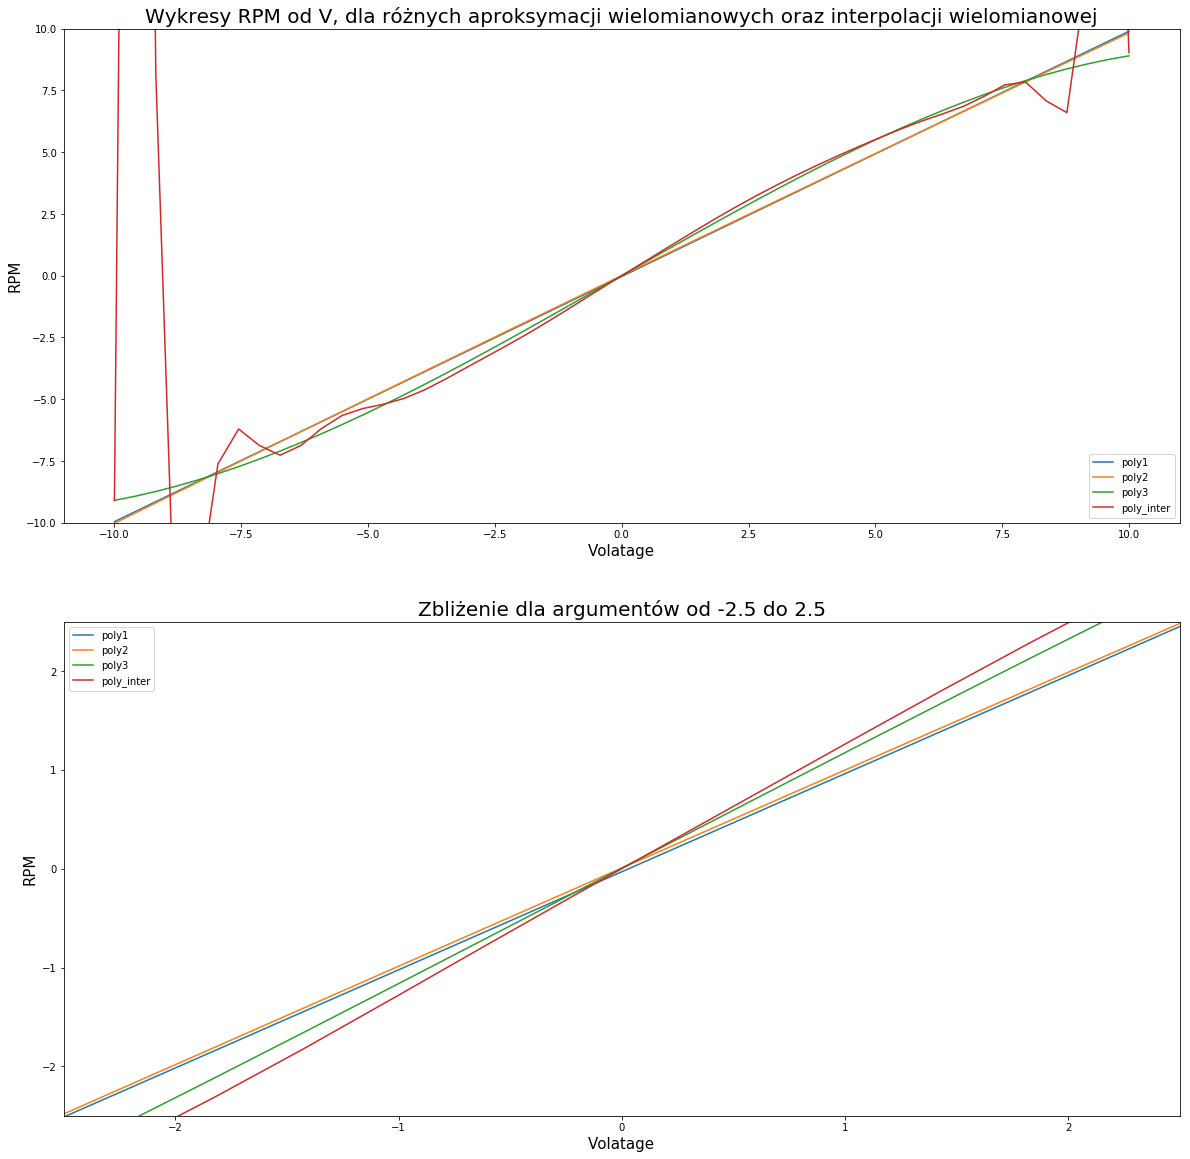

In [302]:
RPM=np.array([-9.10,-8.82,-7.99,-7.10,-6.32,-5.33,-4.73,-3.65,-2.52,-1.28,0.00,1.26,2.49,3.61,4.61,5.51,6.32,7.10,7.81,8.45,9.02])
V=np.arange(-10,11,1)
D=np.linspace(-10, 10)

poly1 = np.poly1d(np.polyfit(V, RPM, 1))
poly2 = np.poly1d(np.polyfit(V, RPM, 2))
poly3 = np.poly1d(np.polyfit(V, RPM, 3))
poly_inter = np.poly1d(np.polyfit(V, RPM, len(V)-1))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,20))

ax1.plot(D, poly1(D), label="poly1")
ax1.plot(D, poly2(D), label="poly2")
ax1.plot(D, poly3(D), label="poly3")
ax1.plot(D, poly_inter(D), label="poly_inter")
ax1.set_ylim(-10, 10)
ax1.set_xlabel("Volatage", fontsize=15)
ax1.set_ylabel("RPM", fontsize=15)
ax1.set_title("Wykresy RPM od V, dla różnych aproksymacji wielomianowych oraz interpolacji wielomianowej", fontsize=20)
ax1.legend()

ax2.plot(D, poly1(D), label="poly1")
ax2.plot(D, poly2(D), label="poly2")
ax2.plot(D, poly3(D), label="poly3")
ax2.plot(D, poly_inter(D), label="poly_inter")
ax2.set_ylim(-2.5, 2.5)
ax2.set_xlim(-2.5, 2.5)
ax2.set_title("Zbliżenie dla argumentów od -2.5 do 2.5", fontsize=20)
ax2.set_ylabel("RPM", fontsize=15)
ax2.set_xlabel("Volatage", fontsize=15)
ax2.legend()

plt.show()

In [270]:
s = np.array([0.0, 42.7, 73.2, 92.5])
t = range(0, 4)
x_foto = 79.6

xs_yt = np.polyfit(s, t, 3) 
xt_ys = np.polyfit(t, s, 3)
f_xs_yt = np.poly1d(xs_yt) # potrzebujemy fukcję czasu od przemieszczenia, żeby znaleźć czas dla położenia x_foto
df_xt_ys = np.poly1d(np.polyder(xt_ys)) # prędkość to pierwsza pochodna położenia po czasie

t_foto = f_xs_yt(x_foto)
v_foto = df_xt_ys(t_foto)

print("Czas w którym samochód znajodwał się w położeniu x={0}m to {1}s, a prędkość w tym czasie, wynosiła {2}m/s".format(x_foto, t_foto, v_foto))

Czas w którym samochód znajodwał się w położeniu x=79.6m to 2.2916950833167684 s, a prędkość w tym czasie, wynosiła 21.508891411001123m/s
